# K-Means
- This notebook contains the code to implement the K-means algorithm from scratch using `Lloyd's Algorithm`
- K-Means is an `Unsupervised Learning` algorithm
- K-means is a `Clustering` algorithm
- This implementation will initialize the centroids randomly
- Also, we will evaluate the model using `Elbow Method`

## Importing Libraries

In [81]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# pre=processing
from sklearn.preprocessing import StandardScaler

## Custom Class

In [67]:
class KMeans:

  def __init__(self,
               n_clusters=5,
               n_iter=100,
               tol=1e-4,
               random_state=None):
    """
    Parameters:
    -----------

    n_clusters: int
                Number of clusters to find in the dataset

    n_iter: int
            Max. no. of iterations to run the algorithm

    tol: float
         To check for convergence of the algorithm

    random_state: int
                  To control randomness and reproducibility of results across multiple runs
    """
    self.n_clusters = n_clusters
    self.n_iter = n_iter
    self.tol = tol
    self.random_state = random_state


  def _euclidean_distance(self, a, b):
    return np.sqrt(np.sum((a - b) ** 2))


  def _initalize_centroids(self, X):
    # random initialization
    indices = np.random.choice(X.shape[0],
                               size=self.n_clusters,
                               replace=False)
    return X[indices, :]


  def _display_training(self):
    plt.figure(figsize=(6, 4))
    plt.plot(range(1, len(self.inertias_) + 1),
             self.inertias_,
             linewidth=2)
    plt.xlabel("No. of Iterations")
    plt.ylabel("Inertia")
    plt.title("Lloyd's Algorithm")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


  def fit(self, X, y=None):
    """
    This method will train a K-Means model
    """
    n = X.shape[0]
    self.inertias_ = []
    self.n_features_in_ = X.shape[1]
    self.centroids_ = self._initalize_centroids(X)
    self.labels_ = None
    self.inertia_ = np.inf

    for i in range(self.n_iter):
      inertia = 0
      # assigning clusters
      labels = np.empty(n, dtype=int)
      for j, x in enumerate(X):
        distances = [self._euclidean_distance(x, centroid)
                     for centroid in self.centroids_]
        index = np.argmin(distances)
        labels[j] = index
        distance = distances[index]
        inertia += distance
      inertia /= n

      # checking convergence
      if np.abs(self.inertia_ - inertia) <= self.tol:
        print(f"> The algorithm converged in {i + 1} iterations")
        self.labels_ = labels
        break
      self.labels_ = labels
      self.inertia_ = inertia
      self.inertias_.append(inertia)

      # updating centroids
      for label in np.unique(self.labels_):
        subset = X[self.labels_ == label]
        self.centroids_[label] = np.mean(subset, axis=0)

    if i == self.n_iter - 1:
      print(f"> The algorithm ran all {self.n_iter} iterations")
    print("> Successfully trained the K-Means model\n")

    return self


  def transform(self, X):
    result = np.array([
        [self._euclidean_distance(x, centroid) for centroid in self.centroids_]
        for x in X
    ])
    return result


  def predict(self, X):
    return np.argmin(self.transform(X), axis=1)

## Getting the Data

In [14]:
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1.0,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)

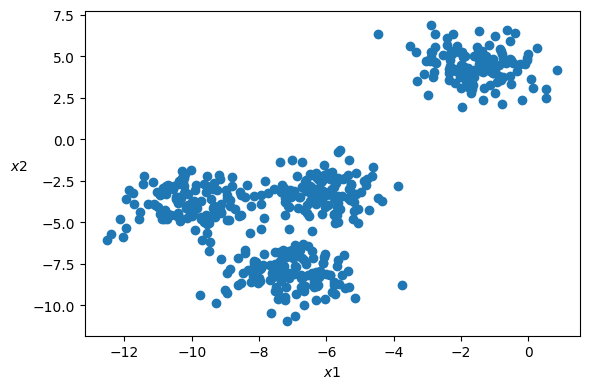

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("$x1$")
plt.ylabel("$x2$", rotation=0, labelpad=10)
plt.tight_layout()
plt.show()

## Scaling the Data

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Training the Model

In [68]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_scaled)

> The algorithm converged in 7 iterations
> Successfully trained the K-Means model



In [69]:
kmeans.centroids_

array([[ 1.45785578,  1.53881252],
       [-1.35607961, -0.60002988],
       [-0.08654165, -0.6425943 ],
       [-1.05478065, -0.16065139]])

In [70]:
kmeans.inertia_

0.45752794545141723

In [71]:
kmeans.inertias_

[0.9809025980072953,
 0.8577162614959926,
 0.6572856050492498,
 0.48868788107950006,
 0.4565437119173388,
 0.45752794545141723]

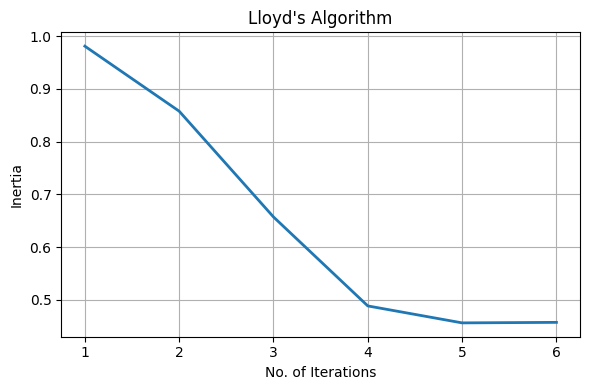

In [73]:
kmeans._display_training()

In [74]:
kmeans.transform(X_scaled)

array([[3.67938618, 1.60110378, 1.09935172, 1.77806908],
       [3.34673394, 0.70170059, 0.74718508, 0.86032246],
       [2.96662123, 0.65390195, 1.17001221, 0.15034198],
       ...,
       [3.56539478, 0.75333251, 0.93703609, 1.02629945],
       [3.23439118, 1.01319982, 0.56400188, 1.08614074],
       [2.20558133, 1.39176321, 0.60211707, 0.9804256 ]])

## Evaluating the Model

### Elbow Method

In [76]:
inertias = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k,
                  random_state=7)
  kmeans.fit(X_scaled)
  inertias.append(kmeans.inertia_)

inertias

> The algorithm converged in 3 iterations
> Successfully trained the K-Means model

> The algorithm converged in 8 iterations
> Successfully trained the K-Means model

> The algorithm converged in 5 iterations
> Successfully trained the K-Means model

> The algorithm converged in 8 iterations
> Successfully trained the K-Means model

> The algorithm converged in 10 iterations
> Successfully trained the K-Means model

> The algorithm converged in 4 iterations
> Successfully trained the K-Means model

> The algorithm converged in 11 iterations
> Successfully trained the K-Means model

> The algorithm converged in 14 iterations
> Successfully trained the K-Means model

> The algorithm converged in 7 iterations
> Successfully trained the K-Means model

> The algorithm converged in 7 iterations
> Successfully trained the K-Means model



[1.2364965309584137,
 0.6408392294166217,
 0.4913832583180852,
 0.4521141499734013,
 0.29891063895257863,
 0.286652783834323,
 0.26728847562112945,
 0.25452151587434296,
 0.24310471776173284,
 0.23817777667142578]

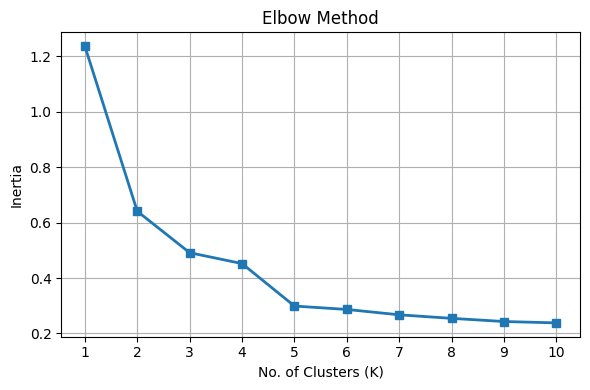

In [79]:
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(inertias) + 1),
         inertias,
         marker="s",
         linewidth=2)
plt.xticks(range(1, len(inertias) + 1))
plt.xlabel("No. of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.tight_layout()
plt.show()

- From the diagram, we can observe that the plot `elbow's` when K = 5
- Usually, the `elbow` point is chosen as the optimal K
- As K increases, inertia will always decrease